<a href="https://colab.research.google.com/github/nadira30/ASRI2022/blob/main/ASRI_cancer_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
#import data set 
df = pd.read_csv('/content/drive/MyDrive/ASRI2022/Intermediate- Cancer/Debernardi-data.csv')
#this will tell us how big the dataset is, with rows then columns
print(df.shape)

#print the list of column names
print (df.columns, len(df.columns))

(590, 14)
Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object') 14


count    590.000000
mean      59.079661
std       13.109520
min       26.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       89.000000
Name: age, dtype: float64

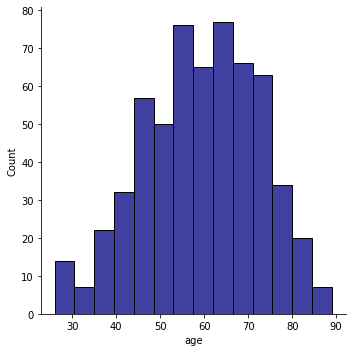

In [101]:
#histogram to show the age range of the sample collected
sns.displot(df, x="age", color = 'navy')
df['age'].describe()

Hypothesis: 
1- Can we use the data to determine if a patient has cancer or not? 
2- Can we determine the stage of a cancer patient? 
3- Is there a correlation between the different biomarkers? 

In [19]:
#print the first 6 rows to see what the data looks like
print(df.head())

  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.95000

In [20]:
# Checking to see if there are any columns with missing values
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [21]:
# to preserve the benign samples, we can fill the missing values in the "stage" and benign_sample_diagnosis column with a placeholder
df['stage'] = df['stage'].fillna('0')
df['benign_sample_diagnosis'] = df['benign_sample_diagnosis'].fillna('N/A')
# Checking columns with missing values again
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

Dropping column with too many missing data(60% missing data).

In [22]:
print("... Drop columns with too many NAs ...", flush=True)
        # Drop columns with > 60% missing data
n_cols_before_drop = len(df.columns.values)
df2 = df[df.columns[df.isna().mean() <= 0.40]]
n_cols_after_drop = len(df2.columns.values)
print(f"Using {n_cols_after_drop} features of {n_cols_before_drop}, due to NA values.")

... Drop columns with too many NAs ...
Using 12 features of 14, due to NA values.


In [23]:
#print the list of column names
print (df.columns, len(df.columns))

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object') 14


count    590.000000
mean       2.027119
std        0.804873
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: diagnosis, dtype: float64

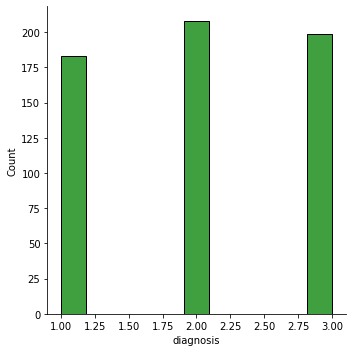

In [103]:
sns.displot(df, x="diagnosis", color='green')
df['diagnosis'].describe()

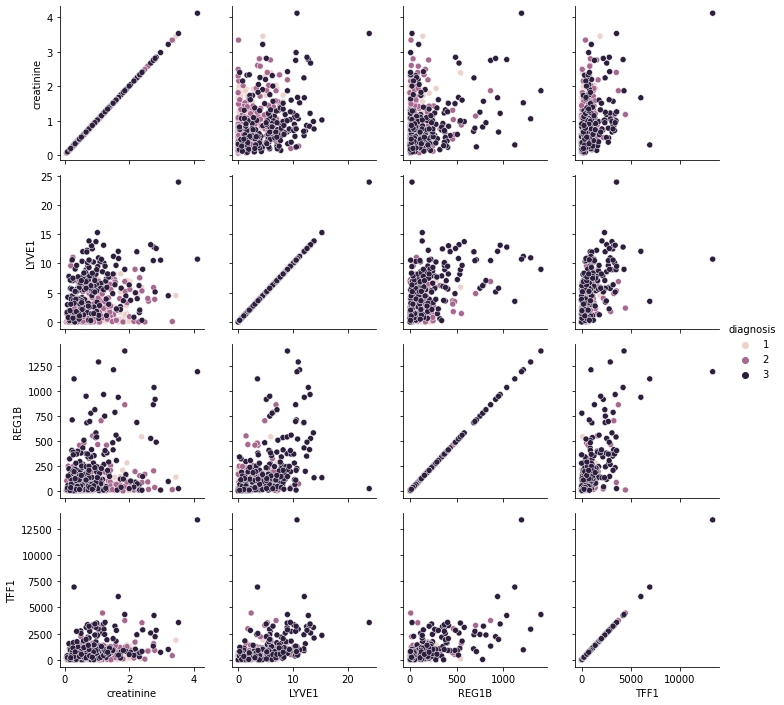

In [104]:
#statistical analysis, confirm with Anova test
features = ['creatinine','LYVE1','REG1B','TFF1']
g = sns.PairGrid(df, vars=features, hue = 'diagnosis')
g.map(sns.scatterplot, color = 'purple')
g.add_legend()

In [ ]:

# explore relationship between REG1B and Diagnosis
X= np.array(df[features])
print(X.shape)

y = df['diagnosis']
print(y.shape)

# we will assign this variable target_names to help us with the evaluation of each classifier
target_names = ['1 (Control)','2 (Benign)', '3 (Cancer)']

(590, 4)
(590,)


Since the values are not continuous, this is a classification problem. Let' use a random forest classification method.
 https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
 https://towardsdatascience.com/building-classification-models-with-sklearn-6a8fd107f0c1 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [53]:
# prepare scaled data for comparison
scaler = preprocessing.StandardScaler().fit(X)
X_pred = scaler.transform(X)

## K-Nearest Neighbors Classifier 

In [54]:
# K-Nearest Neighbors Classifier WITHOUT scaling
#define the model
clas_knn = KNeighborsClassifier(n_neighbors=3)
#fit the model
clas_knn.fit(X, y)
#make predictions
pred_knn = clas_knn.predict(X)
print("Without Scaling")
# check accuracy
print(classification_report(y, pred_knn, target_names=target_names))

# K-Nearest Neighbors Classifier WITH scaling
#fit the model
clas_knn.fit(X_pred, y)
#make predictions
pred_knn_scaled = clas_knn.predict(X_pred)
print("With Scaling")
# check accuracy
print(classification_report(y, pred_knn_scaled, target_names=target_names))


Without Scaling
              precision    recall  f1-score   support

 1 (Control)       0.64      0.78      0.70       183
  2 (Benign)       0.75      0.67      0.71       208
  3 (Cancer)       0.84      0.76      0.80       199

    accuracy                           0.74       590
   macro avg       0.74      0.74      0.74       590
weighted avg       0.75      0.74      0.74       590

With Scaling
              precision    recall  f1-score   support

 1 (Control)       0.71      0.83      0.77       183
  2 (Benign)       0.78      0.73      0.75       208
  3 (Cancer)       0.84      0.77      0.81       199

    accuracy                           0.77       590
   macro avg       0.78      0.78      0.78       590
weighted avg       0.78      0.77      0.77       590



In [64]:
#define confusion matrix without scaling
knn_conf_matrix = confusion_matrix(y, pred_knn_scaled)
print(knn_conf_matrix)
#with scaling
knn_conf_matrix_scaled = confusion_matrix(y, pred_knn_scaled)
print('scaled:')
print(knn_conf_matrix_scaled)

[[152  25   6]
 [ 34 151  23]
 [ 27  18 154]]
scaled:
[[152  25   6]
 [ 34 151  23]
 [ 27  18 154]]


In [87]:
axis = df.drop_duplicates(subset='diagnosis',keep='last')
print(axis['diagnosis'])

182    1
390    2
589    3
Name: diagnosis, dtype: int64


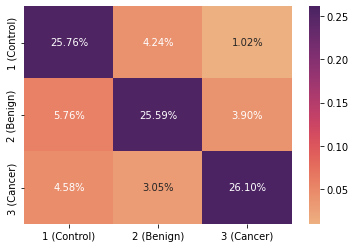

In [89]:
# make heatmap
sns.heatmap(knn_conf_matrix/np.sum(knn_conf_matrix), annot=True, 
          fmt='.2%', cmap='flare', xticklabels=target_names, yticklabels=target_names)

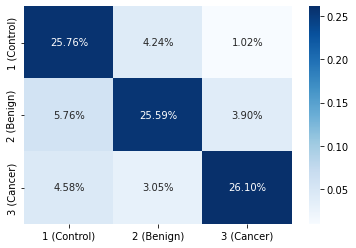

In [90]:
sns.heatmap(knn_conf_matrix_scaled/np.sum(knn_conf_matrix_scaled),annot=True,fmt='.2%',cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)

## Random Forest Classifier 

In [95]:
#Random Forest classification package
# Define a random forest classification object, fit model, and evaluate performance
class_rf = RandomForestClassifier(n_estimators=10)
class_rf.fit(X, y)
y_rf_pred = class_rf.predict(X)
print("Without Scaling")
# check accuracy
print(classification_report(y, y_rf_pred, target_names=target_names))

#Random Forest  classifier WITH scaling
#fit the model
class_rf.fit(X_pred, y)
#make predictions
y_rf_pred_scaled = class_rf.predict(X_pred)
print("With Scaling")
# check accuracy
print(classification_report(y, y_rf_pred_scaled , target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

 1 (Control)       0.97      1.00      0.98       183
  2 (Benign)       1.00      0.96      0.98       208
  3 (Cancer)       0.99      0.99      0.99       199

    accuracy                           0.98       590
   macro avg       0.98      0.99      0.98       590
weighted avg       0.99      0.98      0.98       590

With Scaling
              precision    recall  f1-score   support

 1 (Control)       0.95      0.99      0.97       183
  2 (Benign)       0.98      0.95      0.96       208
  3 (Cancer)       0.98      0.98      0.98       199

    accuracy                           0.97       590
   macro avg       0.97      0.97      0.97       590
weighted avg       0.97      0.97      0.97       590



In [98]:
#confusion matrix 
rfclass_matrix= confusion_matrix(y, y_rf_pred)
print(rfclass_matrix)
#scaled
print('scaled')
rfclass_matrix_scaled = confusion_matrix(y, y_rf_pred_scaled)
print(rfclass_matrix_scaled)

[[183   0   0]
 [  6 200   2]
 [  0   1 198]]
scaled
[[182   1   0]
 [  8 197   3]
 [  1   3 195]]


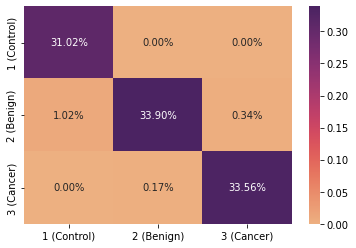

In [99]:
#heatmap
# make heatmap
sns.heatmap(rfclass_matrix/np.sum(rfclass_matrix), annot=True, 
            fmt='.2%', cmap='flare', xticklabels=target_names, yticklabels= target_names)

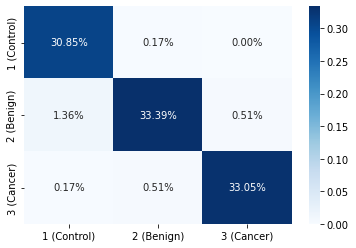

In [100]:
#Scaled
# make heatmap
sns.heatmap(rfclass_matrix_scaled/np.sum(rfclass_matrix_scaled), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=target_names, yticklabels= target_names)